In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Directory paths
train_dir = r'C:\Users\hp\Documents\Assigments\CMH'

In [5]:
# Image preprocessing function
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    image = cv2.Canny(image, 100, 200)
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    return image

In [6]:
# Load images and labels
def load_images_and_labels(train_dir):
    images = []
    labels = []
    for file_name in os.listdir(train_dir):
        if file_name.endswith('.jpeg'):
            image_path = os.path.join(train_dir, file_name)
            image = preprocess_image(image_path)
            # Extract label from file name, assuming format: 'label_description.jpeg'
            label = int(file_name.split('.')[0])
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

In [7]:
images, labels = load_images_and_labels(train_dir)

In [8]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)


In [15]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

def build_model(input_shape=(224, 224, 1)):
    model = Sequential([
        RandomFlip('horizontal', input_shape=input_shape),
        RandomRotation(0.2),
        RandomZoom(0.2),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    return model


In [12]:
batch_size = 32
# k-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(images), start=1):
    train_images, val_images = images[train_index], images[val_index]
    train_labels, val_labels = labels[train_index], labels[val_index]

    # Create data generators for this fold
    train_generator = datagen.flow(train_images, train_labels, batch_size=batch_size)
    val_generator = datagen.flow(val_images, val_labels, batch_size=batch_size)

    model = build_model()
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_images) // batch_size,
        validation_data=val_generator,
        validation_steps=len(val_images) // batch_size,
        epochs=50
    )

C:\Anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


C:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 31.0001 - mean_absolute_error: 5.0000 - val_loss: 33.8004 - val_mean_absolute_error: 4.9800
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - loss: 30.8148 - mean_absolute_error: 4.9820 - val_loss: 29.9622 - val_mean_absolute_error: 4.5784
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - loss: 26.6409 - mean_absolute_error: 4.5396 - val_loss: 22.0865 - val_mean_absolute_error: 3.6198
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step - loss: 19.5725 - mean_absolute_error: 3.8044 - val_loss: 12.0737 - val_mean_absolute_error: 2.9902
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - loss: 9.7590 - mean_absolute_error: 2.2782 - val_loss: 10.9830 - val_mean_absolute_error: 2.9933
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step - loss: 9.0619 - mean_absolute_error: 2.5137 - val_loss: 13.9326 - val_mean_absolute_error: 2.9990
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - loss: 14.9702 - mean_absolute_error: 2.8759 - val_loss: 9.7671 -

Epoch 46/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step - loss: 5.0176 - mean_absolute_error: 1.9197 - val_loss: 9.0021 - val_mean_absolute_error: 3.0000
Epoch 47/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step - loss: 7.0512 - mean_absolute_error: 2.1999 - val_loss: 9.0469 - val_mean_absolute_error: 3.0003
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step - loss: 7.9367 - mean_absolute_error: 2.3668 - val_loss: 9.1303 - val_mean_absolute_error: 3.0000
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step - loss: 9.1201 - mean_absolute_error: 2.5294 - val_loss: 9.2027 - val_mean_absolute_error: 3.0005
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step - loss: 7.2960 - mean_absolute_error: 2.2727 - val_loss: 9.2135 - val_mean_absolute_error: 2.9994
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 35.4284 - mean_absolute_error: 5.4285 - val_loss: 18.3378 - val_mean_absolute_error: 3.4767
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - loss: 35.1602 - mean_absolute_error: 5.4042 - val_loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step - loss: 4.1787 - mean_absolute_error: 1.7913 - val_loss: 11.4191 - val_mean_absolute_error: 2.9994
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step - loss: 5.2352 - mean_absolute_error: 2.1005 - val_loss: 11.1436 - val_mean_absolute_error: 3.0000
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step - loss: 7.0256 - mean_absolute_error: 2.5474 - val_loss: 11.1593 - val_mean_absolute_error: 3.0009
Epoch 37/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - loss: 6.6721 - mean_absolute_error: 2.1360 - val_loss: 11.0169 - val_mean_absolute_error: 2.9991
Epoch 38/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step - loss: 6.6288 - mean_absolute_error: 2.3253 - val_loss: 10.6589 - val_mean_absolute_error: 3.0000
Epoch 39/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step - loss: 3.0586 - mean_absolute_error: 1.4892 - val_loss: 10.1612 - val_mean_absolute_error: 3.0012
Epoch 40/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step - loss: 6.1285 - mean_absolute_error: 1.9120 - val_loss: 10.1

Epoch 29/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - loss: 11.4407 - mean_absolute_error: 3.0623 - val_loss: 0.3795 - val_mean_absolute_error: 0.4990
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step - loss: 9.3110 - mean_absolute_error: 2.7578 - val_loss: 0.3375 - val_mean_absolute_error: 0.5013
Epoch 31/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step - loss: 7.7586 - mean_absolute_error: 2.5003 - val_loss: 0.2514 - val_mean_absolute_error: 0.5001
Epoch 32/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - loss: 15.4492 - mean_absolute_error: 3.6026 - val_loss: 0.3741 - val_mean_absolute_error: 0.5077
Epoch 33/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - loss: 9.7270 - mean_absolute_error: 3.0701 - val_loss: 0.7443 - val_mean_absolute_error: 0.7034
Epoch 34/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - loss: 6.3625 - mean_absolute_error: 2.2255 - val_loss: 1.2700 - val_mean_absolute_error: 1.0102
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - loss: 11.5967 - mean_absolute_error: 2.9721 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted sheet count: 52


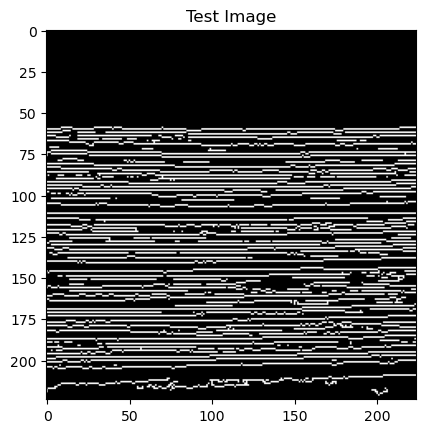

In [18]:
test_image_path = r'C:\Users\hp\Documents\Assigments\CMH\2.jpeg'

test_image = preprocess_image(test_image_path)
test_image = test_image.reshape(1, 224, 224, 1)
prediction = model.predict(test_image)
sheet_count = int(prediction[0][0])

print(f'Predicted sheet count: {sheet_count}')

# Visualize the test image
plt.title('Test Image')
plt.imshow(test_image.squeeze(), cmap='gray')
plt.show()


In [20]:
from tensorflow.keras.layers import BatchNormalization

def build_model(input_shape=(224, 224, 1)):
    model1 = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    return model


In [22]:
batch_size = 32
# k-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(images), start=1):
    train_images, val_images = images[train_index], images[val_index]
    train_labels, val_labels = labels[train_index], labels[val_index]

    # Create data generators for this fold
    train_generator = datagen.flow(train_images, train_labels, batch_size=batch_size)
    val_generator = datagen.flow(val_images, val_labels, batch_size=batch_size)

    model1 = build_model()
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_images) // batch_size,
        validation_data=val_generator,
        validation_steps=len(val_images) // batch_size,
        epochs=50
    )

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 3.7370 - mean_absolute_error: 1.5807 - val_loss: 10.6699 - val_mean_absolute_error: 3.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step - loss: 10.4564 - mean_absolute_error: 2.3958 - val_loss: 9.4477 - val_mean_absolute_error: 3.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step - loss: 7.6088 - mean_absolute_error: 1.9443 - val_loss: 11.2241 - val_mean_absolute_error: 2.9980
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - loss: 6.9642 - mean_absolute_error: 2.1590 - val_loss: 11.6780 - val_mean_absolute_error: 3.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step - loss: 11.0453 - mean_absolute_error: 2.5788 - val_loss: 10.9065 - val_mean_absolute_error: 2.9982
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step - loss: 8.3907 - mean_absolute_error: 2.2106 - val_loss: 9.7845 - val_mean_absolute_error: 3.0001
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step - loss: 7.5303 - mean_absolute_error: 2.0789 - val_loss: 9.

Epoch 46/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step - loss: 4.8820 - mean_absolute_error: 1.9087 - val_loss: 9.6457 - val_mean_absolute_error: 2.9994
Epoch 47/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step - loss: 6.6334 - mean_absolute_error: 2.3349 - val_loss: 9.5689 - val_mean_absolute_error: 2.9998
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - loss: 8.0674 - mean_absolute_error: 2.1863 - val_loss: 9.3441 - val_mean_absolute_error: 2.9991
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step - loss: 7.2286 - mean_absolute_error: 2.3256 - val_loss: 9.1413 - val_mean_absolute_error: 3.0003
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step - loss: 4.7482 - mean_absolute_error: 1.7141 - val_loss: 9.0183 - val_mean_absolute_error: 3.0000
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 9.6997 - mean_absolute_error: 2.9196 - val_loss: 6.4172 - val_mean_absolute_error: 2.4999
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - loss: 7.4411 - mean_absolute_error: 2.2417 - val_loss: 8.2

Epoch 41/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - loss: 5.4221 - mean_absolute_error: 2.0294 - val_loss: 10.3326 - val_mean_absolute_error: 2.5000
Epoch 42/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - loss: 11.0820 - mean_absolute_error: 2.7335 - val_loss: 8.8244 - val_mean_absolute_error: 2.5000
Epoch 43/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - loss: 6.2800 - mean_absolute_error: 2.1545 - val_loss: 8.2792 - val_mean_absolute_error: 2.5000
Epoch 44/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - loss: 8.2761 - mean_absolute_error: 2.7607 - val_loss: 7.8903 - val_mean_absolute_error: 2.5000
Epoch 45/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - loss: 5.5138 - mean_absolute_error: 1.9282 - val_loss: 7.9249 - val_mean_absolute_error: 2.5000
Epoch 46/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step - loss: 10.4761 - mean_absolute_error: 2.9471 - val_loss: 7.8622 - val_mean_absolute_error: 2.5000
Epoch 47/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step - loss: 5.0226 - mean_absolute_error: 1.9247 - val_l

Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step - loss: 11.9912 - mean_absolute_error: 3.0675 - val_loss: 0.4567 - val_mean_absolute_error: 0.5000
Epoch 31/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step - loss: 11.8745 - mean_absolute_error: 3.1862 - val_loss: 0.2864 - val_mean_absolute_error: 0.5000
Epoch 32/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - loss: 11.8036 - mean_absolute_error: 3.1259 - val_loss: 0.2655 - val_mean_absolute_error: 0.5000
Epoch 33/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - loss: 9.5128 - mean_absolute_error: 2.8714 - val_loss: 0.3416 - val_mean_absolute_error: 0.5000
Epoch 34/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step - loss: 8.0176 - mean_absolute_error: 2.6767 - val_loss: 0.3770 - val_mean_absolute_error: 0.5000
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step - loss: 10.0360 - mean_absolute_error: 2.9872 - val_loss: 0.3518 - val_mean_absolute_error: 0.5000
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step - loss: 8.2581 - mean_absolute_error: 2.7004 - val_

Epoch 25/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - loss: 6.2368 - mean_absolute_error: 1.9424 - val_loss: 5.6360 - val_mean_absolute_error: 2.3740
Epoch 26/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step - loss: 7.4650 - mean_absolute_error: 2.3996 - val_loss: 4.5758 - val_mean_absolute_error: 2.1391
Epoch 27/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - loss: 7.4249 - mean_absolute_error: 2.3939 - val_loss: 4.0229 - val_mean_absolute_error: 2.0057
Epoch 28/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step - loss: 7.8648 - mean_absolute_error: 2.3319 - val_loss: 4.3823 - val_mean_absolute_error: 2.0934
Epoch 29/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - loss: 11.8277 - mean_absolute_error: 2.9135 - val_loss: 5.0689 - val_mean_absolute_error: 2.2514
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step - loss: 8.5175 - mean_absolute_error: 2.4879 - val_loss: 6.1913 - val_mean_absolute_error: 2.4882
Epoch 31/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step - loss: 8.5163 - mean_absolute_error: 2.5984 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted sheet count: 63


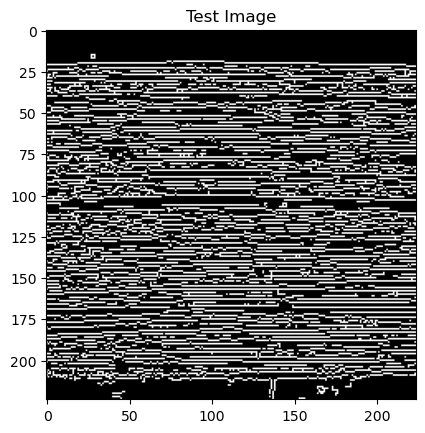

In [26]:
test_image_path = r'C:\Users\hp\Documents\Assigments\CMH\6.jpeg'

test_image = preprocess_image(test_image_path)
test_image = test_image.reshape(1, 224, 224, 1)
prediction = model.predict(test_image)
sheet_count = int(prediction[0][0])

print(f'Predicted sheet count: {sheet_count}')

# Visualize the test image
plt.title('Test Image')
plt.imshow(test_image.squeeze(), cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted sheet count: 47


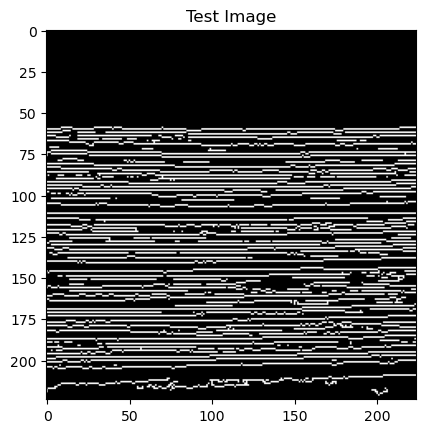

In [31]:
# Test the model with image
def test_model(model_path, test_image_path):
    model = tf.keras.models.load_model(model_path)
    test_image = preprocess_image(test_image_path)
    test_image = test_image.reshape(1, 224, 224, 1)
    prediction = model.predict(test_image)
    sheet_count = int(prediction[0][0])

    print(f'Predicted sheet count: {sheet_count}')

    # Visualize the test image
    plt.title('Test Image')
    plt.imshow(test_image.squeeze(), cmap='gray')
    plt.show()


test_image_path = r'C:\Users\hp\Documents\Assigments\CMH\2.jpeg'  
test_model(r'C:\Users\hp\sheet_count_model_1.keras', test_image_path)

In [19]:
model = tf.keras.models.load_model(r'C:\Users\hp\sheet_count_model_1.keras')

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
val_predictions = model.predict(val_generator)
val_labels = val_labels.flatten()  # Flatten if necessary

# Metrics
mae = mean_absolute_error(val_labels, val_predictions)
mse = mean_squared_error(val_labels, val_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(val_labels, val_predictions)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
MAE: 1.8633
MSE: 3.4718
RMSE: 1.8633
R²: nan


C:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [14]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid


# Define parameter grid
param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'learning_rate': [0.001, 0.01, 0.1]
}

best_score = float('inf')
best_params = {}

# Loop over parameter combinations
for params in ParameterGrid(param_dist):
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])
    
    history = model.fit(
        train_images, train_labels,
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        validation_split=0.2,
        verbose=0
    )
    
    val_loss = min(history.history['val_loss'])
    if val_loss < best_score:
        best_score = val_loss
        best_params = params

print(f"Best score: {best_score} with parameters: {best_params}")


Best score: 1.0403770208358765 with parameters: {'batch_size': 16, 'epochs': 10, 'learning_rate': 0.001}


In [17]:
import keras_tuner as kt

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='intro_to_kt'
)

tuner.search(train_images, train_labels, epochs=20, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters: {best_hps.values}")


Reloading Tuner from my_dir\intro_to_kt\tuner0.json
Best hyperparameters: {'filters_1': 64, 'filters_2': 64, 'units': 128, 'dropout': 0.2, 'learning_rate': 0.0024776210404528786}


In [22]:
model.save('sheet_count_model_1.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted sheet count: 57


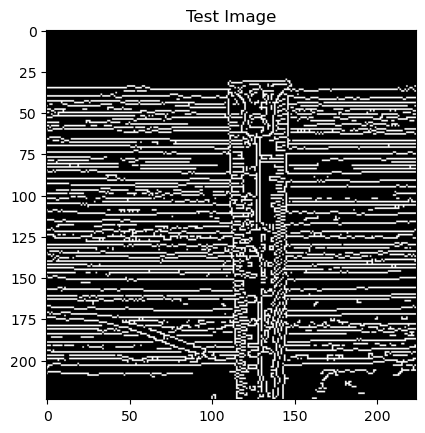

In [24]:
# Test the model
def test_model(model_path, test_image_path):
    model = tf.keras.models.load_model(model_path)
    test_image = preprocess_image(test_image_path)
    test_image = test_image.reshape(1, 224, 224, 1)
    prediction = model.predict(test_image)
    sheet_count = int(prediction[0][0])

    print(f'Predicted sheet count: {sheet_count}')

    # Visualize the test image
    plt.title('Test Image')
    plt.imshow(test_image.squeeze(), cmap='gray')
    plt.show()


test_image_path = r'C:\Users\hp\Documents\Assigments\CMH\9.jpeg'  
test_model(r'C:\Users\hp\sheet_count_model_1.keras', test_image_path)